In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import numpy as np

sns.set_style('darkgrid')
sns.set(font_scale=1.1)

# 1. Download the dataset:

Dataset downloaded and mounted using drive

# 2. Load the dataset.

In [146]:
data = pd.read_csv("drive/MyDrive/Churn_Modelling.csv")

ds = pd.DataFrame(data)
ds.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [37]:
ds.shape

(10000, 14)

# 3. Perform Below Visualizations.

## Univariate Analysis

### Histogram

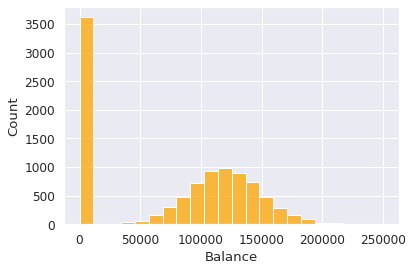

In [72]:
sns.histplot(ds['Balance'],color='orange');

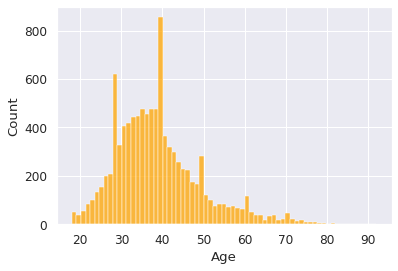

In [73]:
sns.histplot(ds['Age'],color='orange');

### Histogram With KDE

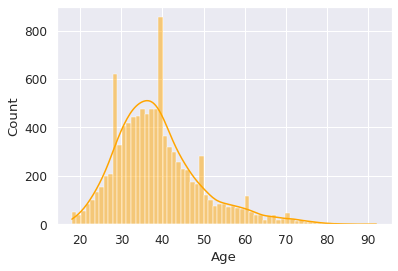

In [74]:
sns.histplot(ds['Age'], kde=True, color='orange')

### KDE Plot

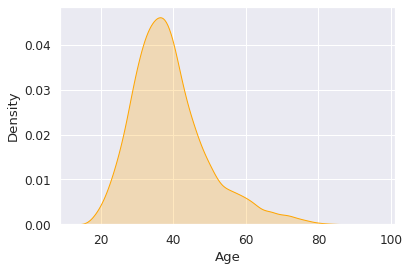

In [75]:
sns.kdeplot(ds['Age'],fill='true',color='orange')

### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


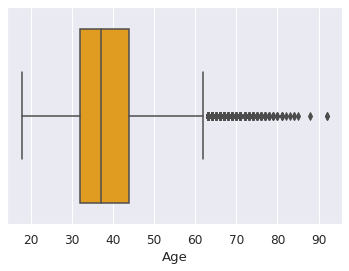

In [76]:
sns.boxplot(ds['Age'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


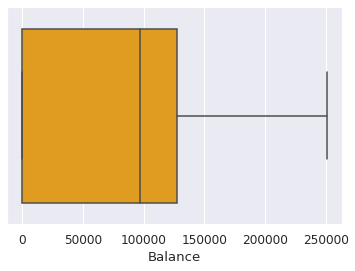

In [77]:
sns.boxplot(ds['Balance'], color='orange')

## Bi - Variate Analysis

In [29]:
ds[['Age','Balance','Exited','EstimatedSalary','NumOfProducts']].corr()

,Age,Balance,Exited,EstimatedSalary,NumOfProducts
Age,1.000000,0.028308,0.285323,-0.007201,-0.030680
Balance,0.028308,1.000000,0.118533,0.012797,-0.304180
Exited,0.285323,0.118533,1.000000,0.012097,-0.047820
EstimatedSalary,-0.007201,0.012797,0.012097,1.000000,0.014204
NumOfProducts,-0.030680,-0.304180,-0.047820,0.014204,1.000000


### KDE plot

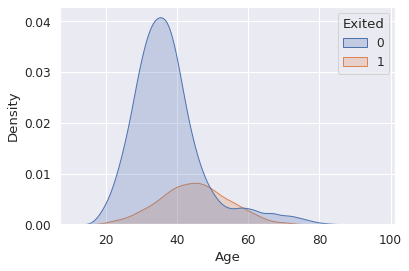

In [78]:
sns.kdeplot(ds['Age'], data=ds, hue=ds['Exited'], fill='true')

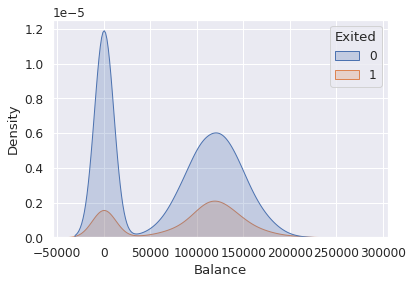

In [79]:
sns.kdeplot(ds['Balance'], data=ds, hue=ds['Exited'], fill='true')

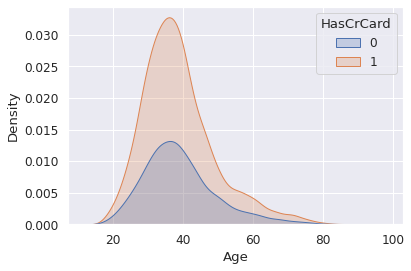

In [80]:
sns.kdeplot(ds['Age'], data=ds, hue=ds['HasCrCard'], fill='true')

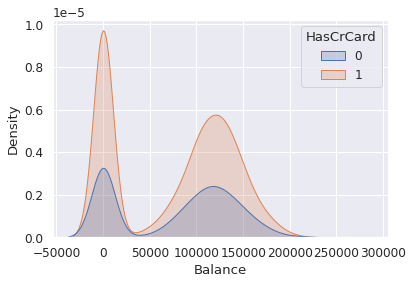

In [81]:
sns.kdeplot(ds['Balance'], data=ds, hue=ds['HasCrCard'], fill='true')

### Count Plot with Hue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


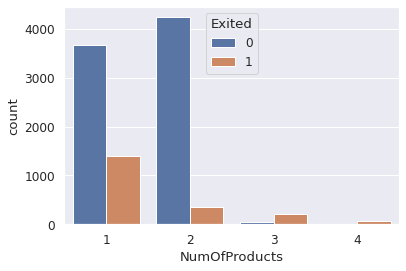

In [82]:
sns.countplot(ds['NumOfProducts'],hue=ds['Exited'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


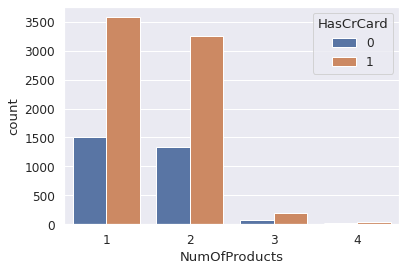

In [83]:
sns.countplot(ds['NumOfProducts'],hue=ds['HasCrCard'])

### Scatter Plot

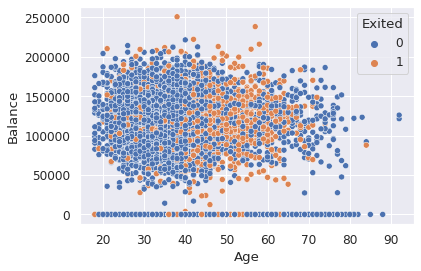

In [84]:
sns.scatterplot(x=ds.Age, y=ds.Balance, hue=ds.Exited)

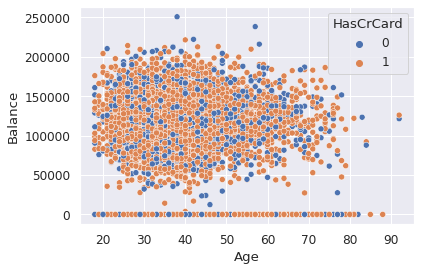

In [85]:
sns.scatterplot(x=ds.Age, y=ds.Balance, hue=ds.HasCrCard)

### Bar Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


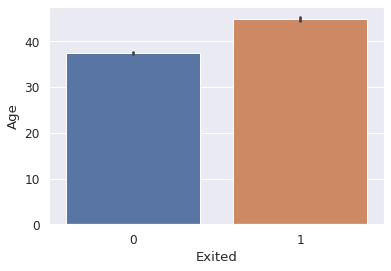

In [86]:
sns.barplot(ds["Exited"],ds["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


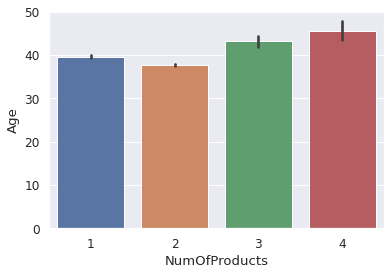

In [87]:
sns.barplot(ds["NumOfProducts"],ds["Age"])

## Multi - Variate Analysis

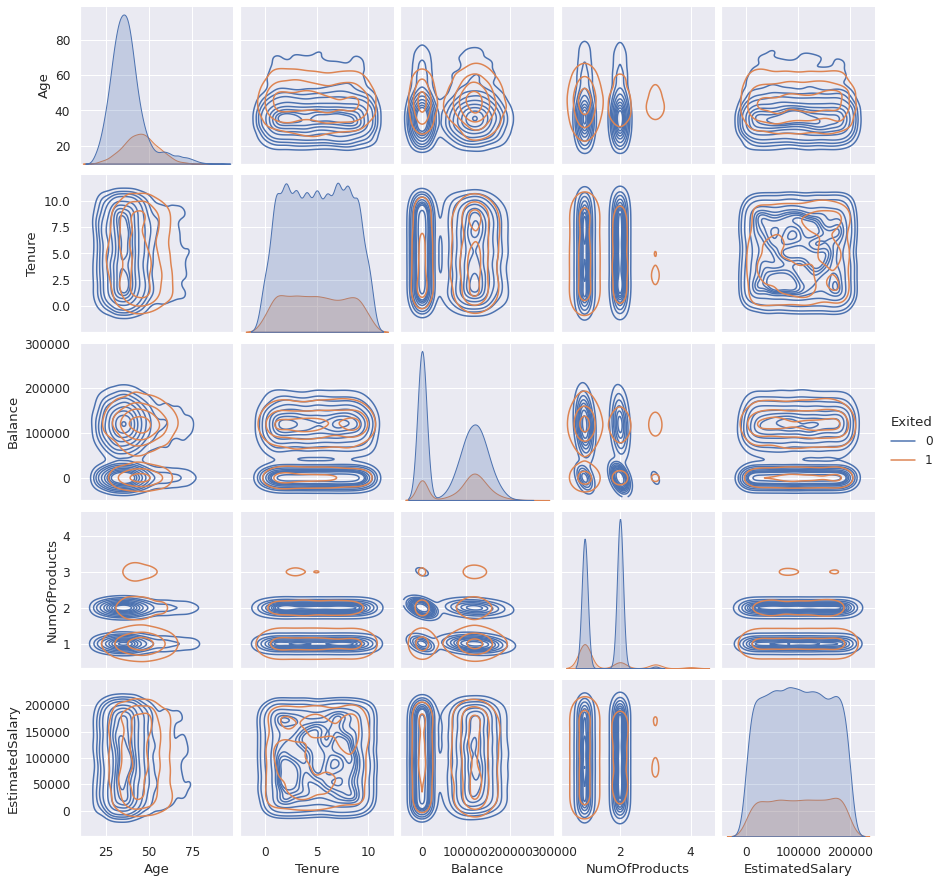

In [101]:
sns.pairplot(data=ds[["Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]], hue="Exited", kind="kde")

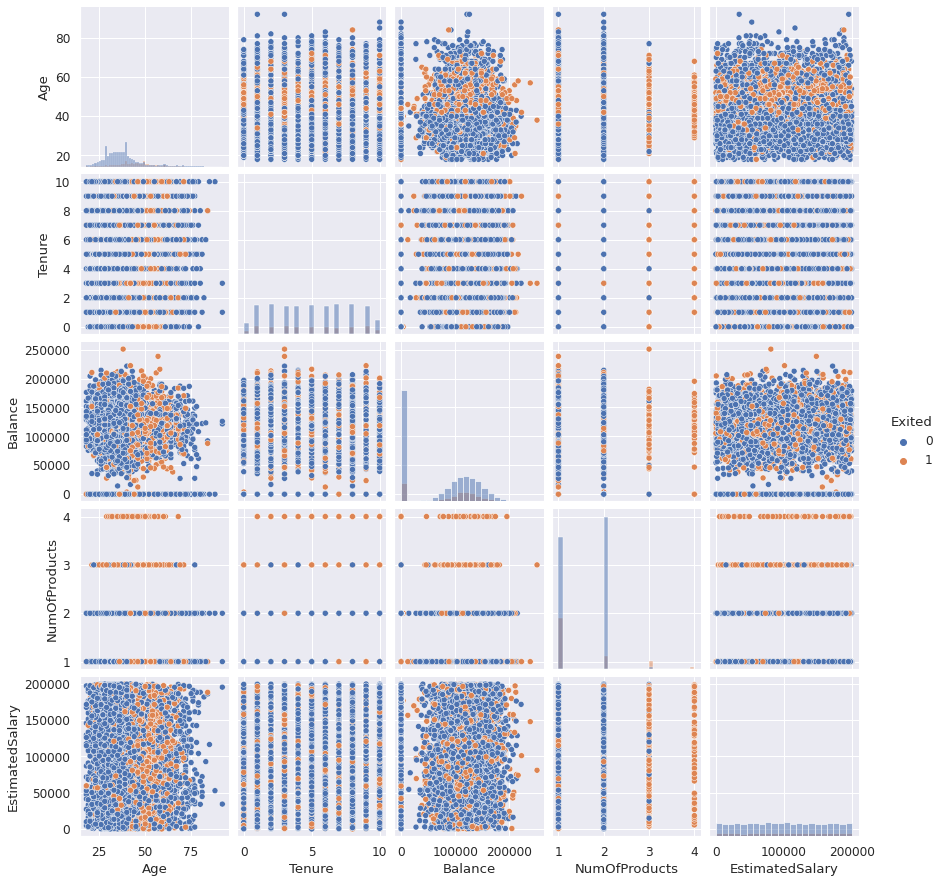

In [97]:
sns.pairplot(data=ds[["Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]], hue="Exited", diag_kind="hist")

# 4. Perform descriptive statistics on the dataset.

In [102]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handle the Missing values.

In [114]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no null values in the dataset

# 6. Find the outliers and replace the outliers



### Identifying Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


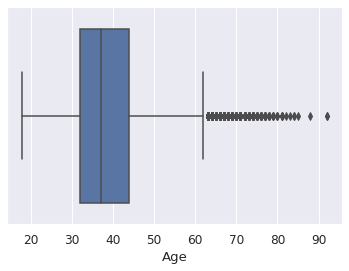

In [162]:
sns.boxplot(ds['Age'],data=ds)

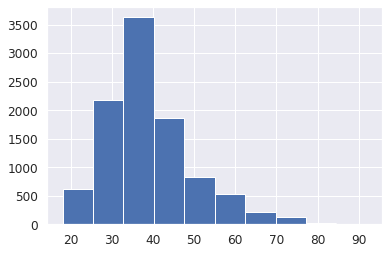

In [167]:
ds['Age'].hist()

In [170]:
print('skewness value of Age: ',ds['Age'].skew())

skewness value of Age:  1.0113202630234552


In [178]:
Q1=ds['Age'].quantile(0.25)
Q3=ds['Age'].quantile(0.75)
IQR=Q3 - Q1
IQR

12.0

In [179]:
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)

In [180]:
ds["Age"] = np.where(ds["Age"] > upper_limit, upper_limit, np.where(ds["Age"] < lower_limit, lower_limit, ds["Age"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


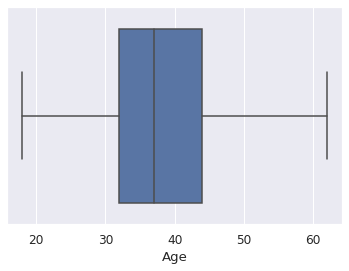

In [183]:
sns.boxplot(ds['Age'],data=ds)

# 7. Check for Categorical columns and perform encoding.

## Check for Categorical Columns

In [185]:
ds.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [189]:
ds["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [195]:
ds["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Replace with encoding

In [197]:
ds["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)
ds["Gender"].replace({"Female":0,"Male":1},inplace = True)

# 8. Split the data into dependent and independent variables.

In [202]:
dependent = ds['Exited']
dependent.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [208]:
in_dependent = ds.drop(columns=["Exited","Surname"],axis=1)
in_dependent.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,1,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,502,1,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,699,1,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,850,2,0,43.0,2,125510.82,1,1,1,79084.10


# 9. Scale the independent variables

In [209]:
index=in_dependent.columns
index

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [211]:
scaled_values = scale(in_dependent)
scaled_values

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476, -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [213]:
scaled_df = pd.DataFrame(scaled_values,columns=index)
scaled_df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.783213,-0.326221,-0.902587,-1.095988,0.342615,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.606534,-0.440036,0.301665,-1.095988,0.240011,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-0.995885,-1.536794,-0.902587,-1.095988,0.342615,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.144767,0.501521,-0.902587,-1.095988,0.034803,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,0.652659,2.063884,0.301665,-1.095988,0.445219,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,-0.902587,0.912419,0.034803,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,1.730838,-1.682806,-1.391939,-0.902587,0.912419,-0.375612,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,1.731185,-1.479282,0.604988,-0.902587,-1.095988,-0.273008,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.731531,-0.119356,1.256835,1.505917,0.912419,0.342615,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


# 10. Split the data into training and testing

In [216]:
x = scaled_df
y = dependent

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [220]:
x_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,0.827747,-0.195066,0.170424,0.301665,-1.095988,-0.478216,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382
9275,1.481077,0.810821,-2.312802,1.505917,0.912419,0.342615,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592
2995,-0.694379,-1.507642,-1.195351,-0.902587,-1.095988,-0.991236,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464
5316,0.109639,1.243462,0.035916,0.301665,0.912419,0.137407,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558
356,-1.608556,-1.100775,2.063884,0.301665,-1.095988,1.881674,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069


In [218]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))